In [26]:
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv('sp500_stocks.csv')


In [28]:
df_NVDA = df[df['Symbol'] == "AAPL"]
df_NVDA = df_NVDA[df['Date'] >= '2020-01-01']
df_NVDA['Date'] = pd.to_datetime(df_NVDA['Date'])

C:\Users\ibrah\AppData\Local\Temp\ipykernel_60736\273790486.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_NVDA = df_NVDA[df['Date'] >= '2020-01-01']


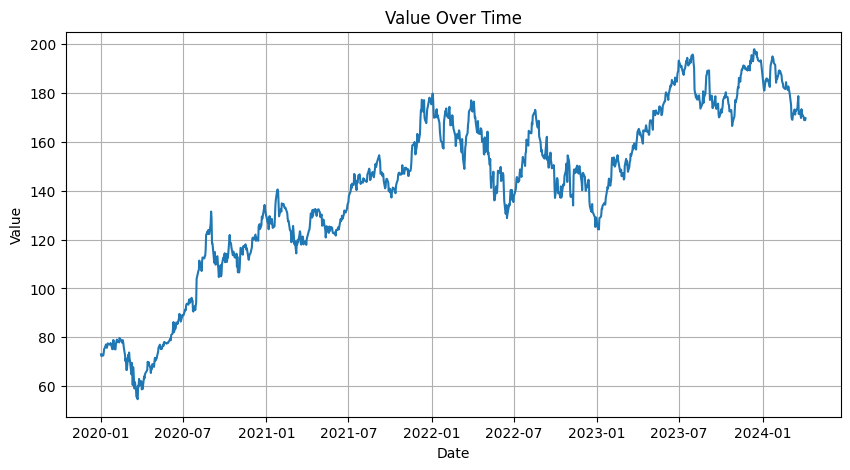

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting the DataFrame
plt.figure(figsize=(10, 5))  # Set the figure size
plt.plot(df_NVDA['Date'], df_NVDA['Adj Close'])  # Plot a line chart
plt.title('Value Over Time')  # Add a title
plt.xlabel('Date')  # Label the x-axis
plt.ylabel('Value')  # Label the y-axis
plt.grid(True)  # Show grid
plt.show()  # Display the plot


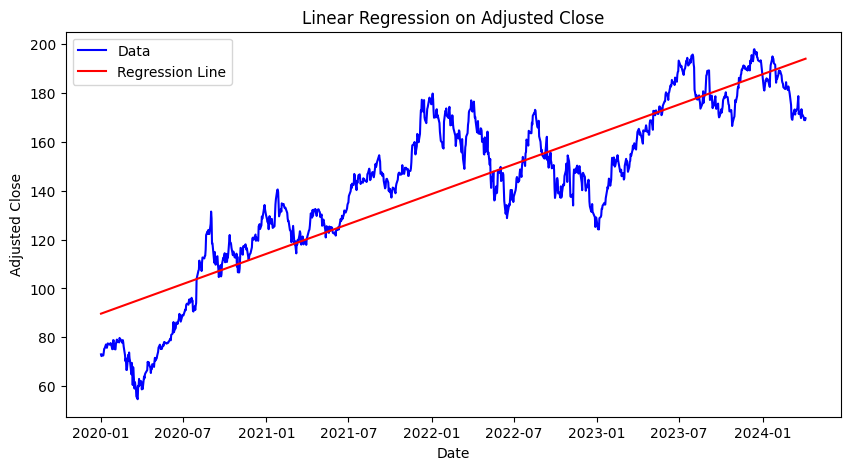

In [30]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Prepare data for regression
X = df_NVDA['Date'].map(pd.Timestamp.toordinal).values.reshape(-1, 1)
y = df_NVDA['Adj Close'].values.reshape(-1, 1)

# Linear Regression
model = LinearRegression()
model.fit(X, y)

# Predicting
df_NVDA['Predicted'] = model.predict(X)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(df_NVDA['Date'], df_NVDA['Adj Close'], color='blue', label='Data')  # Scatter plot of the data
plt.plot(df_NVDA['Date'], df_NVDA['Predicted'], color='red', label='Regression Line')  # Regression line
plt.title('Linear Regression on Adjusted Close')
plt.xlabel('Date')
plt.ylabel('Adjusted Close')
plt.legend()
plt.show()


In [31]:
df_NVDA['Prev Day Adj Close'] = df_NVDA['Adj Close'].shift(1)
df_NVDA = df_NVDA.iloc[1:]  # Excludes the first row
print(df_NVDA)

             Date Symbol   Adj Close       Close        High         Low  \
142449 2020-01-03   AAPL   72.349113   74.357498   75.144997   74.125000   
142450 2020-01-06   AAPL   72.925629   74.949997   74.989998   73.187500   
142451 2020-01-07   AAPL   72.582664   74.597504   75.224998   74.370003   
142452 2020-01-08   AAPL   73.750229   75.797501   76.110001   74.290001   
142453 2020-01-09   AAPL   75.316757   77.407501   77.607498   76.550003   
...           ...    ...         ...         ...         ...         ...   
143515 2024-04-01   AAPL  170.029999  170.029999  171.250000  169.479996   
143516 2024-04-02   AAPL  168.839996  168.839996  169.339996  168.229996   
143517 2024-04-03   AAPL  169.649994  169.649994  170.679993  168.580002   
143518 2024-04-04   AAPL  168.820007  168.820007  171.919998  168.820007   
143519 2024-04-05   AAPL  169.580002  169.580002  170.389999  168.949997   

              Open       Volume   Predicted  Prev Day Adj Close  
142449   74.287498  1

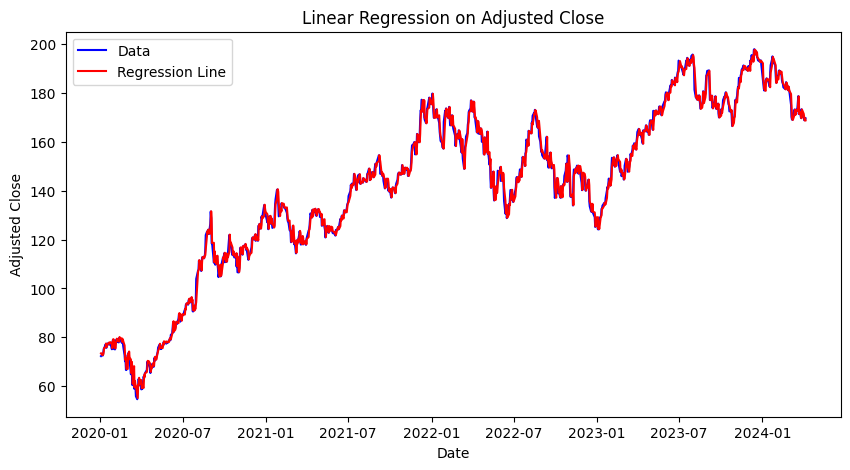

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Prepare data for regression
X = df_NVDA['Prev Day Adj Close'].values.reshape(-1, 1)
y = df_NVDA['Adj Close'].values.reshape(-1, 1)

train_size = int(len(X) * 0.8)

# Split the data into training and testing sets using slicing
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting
df_NVDA['Predicted'] = model.predict(X)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(df_NVDA['Date'], df_NVDA['Adj Close'], color='blue', label='Data')  # Scatter plot of the data
plt.plot(df_NVDA['Date'], df_NVDA['Predicted'], color='red', label='Regression Line')  # Regression line
plt.title('Linear Regression on Adjusted Close')
plt.xlabel('Date')
plt.ylabel('Adjusted Close')
plt.legend()
plt.show()




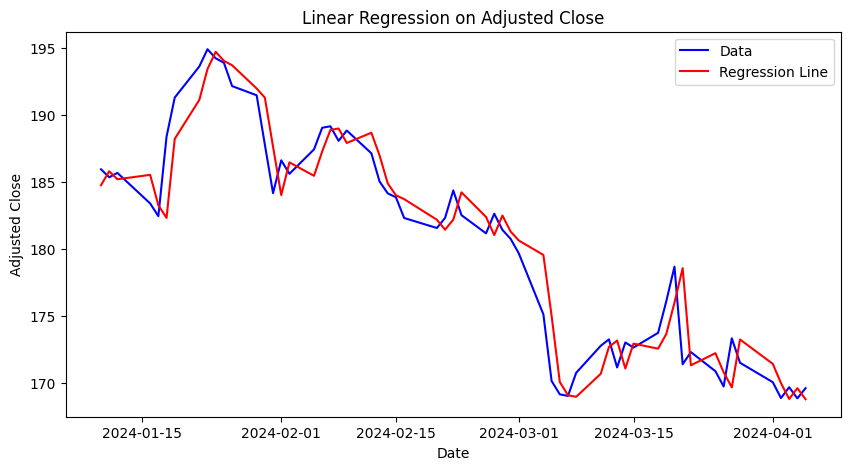

In [33]:
plt.figure(figsize=(10, 5))
plt.plot(df_NVDA['Date'][-60:], df_NVDA['Adj Close'][-60:], color='blue', label='Data')  # Scatter plot of the data
plt.plot(df_NVDA['Date'][-60:], df_NVDA['Predicted'][-60:], color='red', label='Regression Line')  # Regression line
plt.title('Linear Regression on Adjusted Close')
plt.xlabel('Date')
plt.ylabel('Adjusted Close')
plt.legend()
plt.show()

              mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
143306  176.339662  0.190815     175.965139     176.714185    171.050221   
143307  176.417170  0.174112     176.075432     176.758908    171.129950   
143308  179.132920  0.193109     178.753895     179.511945    173.843159   
143309  180.002221  0.197106     179.615350     180.389093    174.711892   
143310  178.834905  0.180312     178.480997     179.188813    173.546884   
...            ...       ...            ...            ...           ...   
143515  171.411459  0.201646     171.015678     171.807240    166.120470   
143516  170.125970  0.175346     169.781809     170.470131    164.838592   
143517  168.914227  0.164773     168.590819     169.237636    163.628160   
143518  169.598578  0.156193     169.292009     169.905148    164.313514   
143519  168.799316  0.151328     168.502295     169.096336    163.514797   

        obs_ci_upper  
143306    181.629103  
143307    181.704391  
143308    184.4226

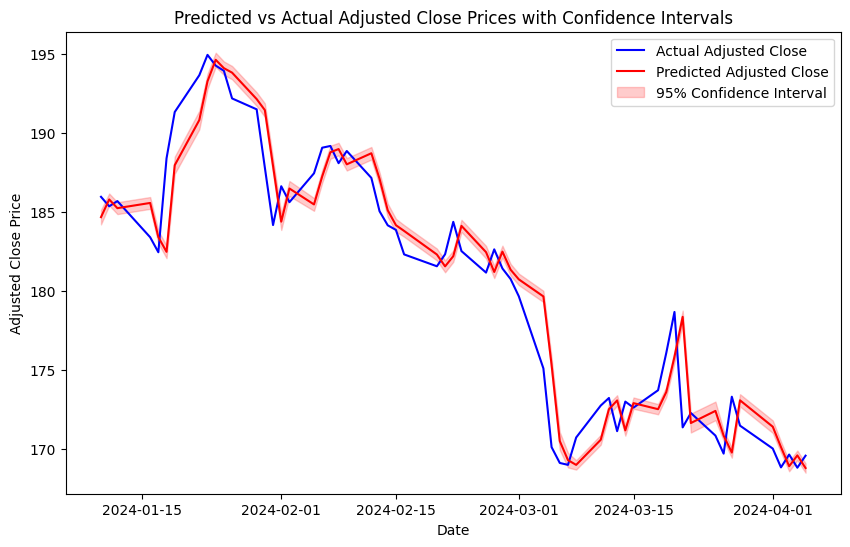

Mean Squared Error: 4.865785217247265


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

# Step 1: Load the data
df = pd.read_csv('sp500_stocks.csv')
data = df[df['Symbol'] == "AAPL"]
data = data[data['Date'] >= '2020-01-01']
data['Date'] = pd.to_datetime(data['Date'])  # Convert the date column to datetime
data = data.sort_values(by='Date')  # Sort data by date

# Step 2: Generate lag features
for i in range(1, 4):  # Creating 3 lags as an example
    data[f'lag_{i}'] = data['Adj Close'].shift(i)

# Remove any rows with NaN values that were created by shifting
data = data.dropna()

# Step 3: Define features and target variable
X = data[[f'lag_{i}' for i in range(1, 4)]]  # Features are the lagged values
y = data['Adj Close']  # Target is the current adjusted close

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Step 5: Fit model using statsmodels for detailed statistics
model = sm.OLS(y_train, X_train)
results = model.fit()

# Predict and calculate confidence intervals
predictions = results.get_prediction(X_test)
pred_summary = predictions.summary_frame(alpha=0.05)  # Get the summary dataframe with predictions and intervals
print(pred_summary)
# Step 6: Plotting results
plt.figure(figsize=(10, 6))
plt.plot(data['Date'].iloc[len(y_train):][-60:], y_test[-60:], label='Actual Adjusted Close', color='blue')
plt.plot(data['Date'].iloc[len(y_train):][-60:], pred_summary['mean'][-60:], label='Predicted Adjusted Close', color='red')
plt.fill_between(data['Date'].iloc[len(y_train):][-60:], pred_summary['mean_ci_lower'][-60:], pred_summary['mean_ci_upper'][-60:], color='red', alpha=0.2, label='95% Confidence Interval')
plt.title('Predicted vs Actual Adjusted Close Prices with Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

# Calculate and print MSE
mse = mean_squared_error(y_test, pred_summary['mean'])
print(f'Mean Squared Error: {mse}')


[4.854375176144653, 4.9034331281191115, 4.924729986315663, 4.962121153669633, 4.915847310995964, 4.968340487559447, 4.920759457543464, 4.912094294062499, 4.9043239032821155, 4.963853997299293, 5.028527171574421, 5.131948108268496, 5.140390740873641, 5.033106059697343, 5.068341022628365, 5.089208462576262, 5.121257146469867, 4.957591495217174, 5.115796569445148, 5.22911719325496, 5.278403572795387, 5.209049660575154, 5.391754812956141, 5.555915958851762, 5.333411922188821, 5.735718410841468, 5.741221360431669, 5.681560407905351, 5.505786555078649, 5.734716535566863]


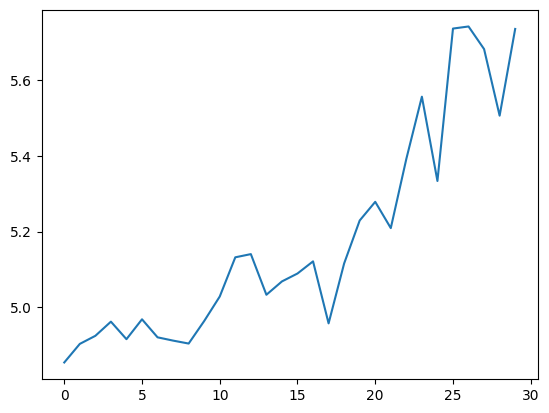

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Step 1: Load the data
df = pd.read_csv('sp500_stocks.csv')
data = df[df['Symbol'] == "AAPL"]
data = data[data['Date'] >= '2020-01-01']
data['Date'] = pd.to_datetime(data['Date'])  # Convert the date column to datetime
data = data.sort_values(by='Date')  # Sort data by date
lag_error = []
for lag_amount in range(30):
    # Step 2: Generate lag features
    for i in range(1, lag_amount+2):  # Creating 3 lags as an example
        data[f'lag_{i}'] = data['Adj Close'].shift(i)

    # Remove any rows with NaN values that were created by shifting
    data = data.dropna()

    # Step 3: Define features and target variable
    X = data[[f'lag_{i}' for i in range(1, lag_amount+2)]]  # Features are the lagged values
    y = data['Adj Close']  # Target is the current adjusted close

    # Step 4: Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,shuffle=False)

    # Step 5: Build a regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Step 6: Evaluate the model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    # print(f'Mean Squared Error: {mse}')
    lag_error.append(mse)
print(lag_error)
plt.plot(range(30), lag_error)

1
2
3
4
5
6
7


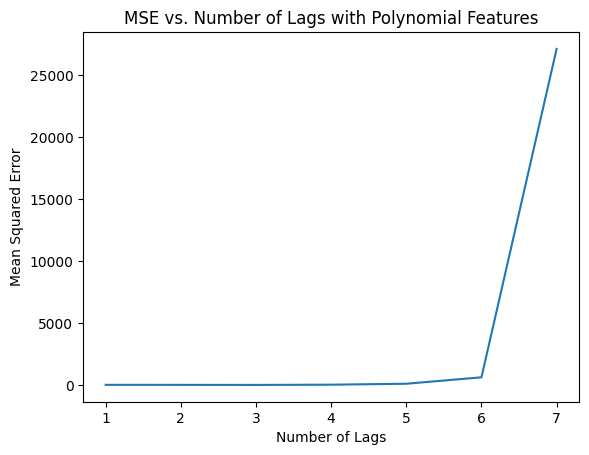

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Step 1: Load the data
df = pd.read_csv('sp500_stocks.csv')
data = df[df['Symbol'] == "AAPL"]
data = data[data['Date'] >= '2020-01-01']
data['Date'] = pd.to_datetime(data['Date'])  # Convert the date column to datetime
data = data.sort_values(by='Date')  # Sort data by date
lag_error = []

for lag_amount in range(1, 8):  # Adjusted to start from 1 and go up to 10
    # Step 2: Generate lag features
    for i in range(1, lag_amount+1):  # Creating lag features up to lag_amount
        data[f'lag_{i}'] = data['Adj Close'].shift(i)

    # Remove any rows with NaN values that were created by shifting
    current_data = data.dropna()

    # Step 3: Define features and target variable
    X = current_data[[f'lag_{i}' for i in range(1, lag_amount+1)]]  # Features are the lagged values
    y = current_data['Adj Close']  # Target is the current adjusted close

    # Step 4: Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

    # Step 5: Transform features into polynomial features
    poly = PolynomialFeatures(degree=5)  # Create polynomial features of degree 2
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Build a regression model with polynomial features
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Step 6: Evaluate the model
    y_pred = model.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)
    lag_error.append(mse)
    print(lag_amount)

# Plotting the error results
plt.plot(range(1, 8), lag_error)
plt.xlabel('Number of Lags')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs. Number of Lags with Polynomial Features')
plt.show()
